Yapay Öğrenmeye Giriş I

Ali Taylan Cemgil


# Parametrik Regresyon, Parametrik Fonksyon Oturtma Problemi (Parametric Regression, Function Fitting)


Verilen girdi ve çıktı ikilileri $x, y$ için parametrik bir fonksyon $f$ oturtma problemi. 

Parametre $w$ değerlerini öyle bir seçelim ki 
$$
y \approx f(x; w)
$$

$x$: Girdi (Input)

$y$: Çıktı (Output)

$w$: Parametre (Weight, ağırlık)

$e$: Hata

Örnek 1: 
$$
e = y - f(x)
$$

Örnek 2:
$$
e = \frac{y}{f(x)}-1
$$

$E$, $D$: Hata fonksyonu (Error function), Iraksay (Divergence)



# Doğrusal Regresyon (Linear Regression)

Oturtulacak $f$ fonksyonun **model parametreleri** $w$ cinsinden doğrusal olduğu durum (Girdiler $x$ cinsinden doğrusal olması gerekmez).  

## Tanım: Doğrusallık
Bir $g$ fonksyonu doğrusaldır demek, herhangi skalar $a$ ve $b$ içn
$$
g(aw_1 + b w_2) = a g(w_1) + b g(w_2)
$$
olması demektir.






## Örnek: Doğru oturtmak (Line Fitting)

* Girdi-Çıktı ikilileri
$$
(x_i, y_i)
$$
$i=1\dots N$ 

* Model
$$
y_i \approx f(x; w_1, w_0) = w_0 + w_1 x 
$$


>  $x$ : Girdi 

>  $w_1$: Eğim

>  $w_0$: Kesişme

$f_i \equiv f(x_i; w_1, w_0)$

## Örnek 2: Parabol Oturtma

* Girdi-Çıktı ikilileri
$$
(x_i, y_i)
$$
$i=1\dots N$ 

* Model
$$
y_i \approx f(x_i; w_2, w_1, w_0) = w_0 + w_1 x_i + w_2 x_i^2
$$


>  $x$ : Girdi 

>  $w_2$: Karesel terimin katsayısı 

>  $w_1$: Doğrusal terimin katsayısı

>  $w_0$: Sabit terim katsayısı

$f_i \equiv f(x_i; w_2, w_1, w_0)$

Bir parabol $x$'in doğrusal fonksyonu değil ama $w_2, w_1, w_0$ parametrelerinin doğrusal fonksyonu.


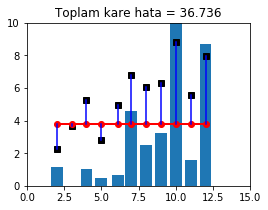

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pylab as plt
from IPython.display import clear_output, display, HTML

x = np.array([8.0 , 6.1 , 11.,  7.,   9.,   12. , 4.,   2.,   10,    5,    3])
y = np.array([6.04, 4.95, 5.58, 6.81, 6.33, 7.96, 5.24, 2.26, 8.84, 2.82, 3.68])

def plot_fit(w1, w0):
    f = w0 + w1*x

    plt.figure(figsize=(4,3))
    plt.plot(x,y,'sk')
    plt.plot(x,f,'o-r')
    #plt.axis('equal')
    plt.xlim((0,15))
    plt.ylim((0,10))
    for i in range(len(x)):
        plt.plot((x[i],x[i]),(f[i],y[i]),'b')
#    plt.show()
#    plt.figure(figsize=(4,1))
    plt.bar(x,(f-y)**2/2)
    plt.title('Toplam kare hata = '+str(np.sum((f-y)**2/2)))
    plt.ylim((0,10))
    plt.xlim((0,15))
    plt.show()
    
plot_fit(0.0,3.79)

In [ ]:
interact(plot_fit, w1=(-2, 2, 0.01), w0=(-5, 5, 0.01));

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.0, description='w0', max=5.0, min=-5.0, step=0.01), Output()), _dom_classes=('widget-interact',))

Rasgele Arama

In [ ]:
x = np.array([8.0 , 6.1 , 11.,  7.,   9.,   12. , 4.,   2.,   10,    5,    3])
y = np.array([6.04, 4.95, 5.58, 6.81, 6.33, 7.96, 5.24, 2.26, 8.84, 2.82, 3.68])


def hata(y, x, w):
    N = len(y)
    f = x*w[1]+w[0]
    e = y-f
    return np.sum(e*e)/2


w = np.array([0, 0])
E = hata(y, x, w)

for e in range(1000):
    g = 0.1*np.random.randn(2)   
    w_temp = w + g
    E_temp = hata(y, x, w_temp)
    if E_temp<E:
        E = E_temp
        w = w_temp
        #print(e, E)
print(e, E)
w

999 6.88573142353


array([ 2.01760086,  0.49685693])

Gerçek veri: Türkiyedeki araç sayıları

In [ ]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac[['Year','Car']]
#df_arac

,Year,Car
0,1966,91469
1,1967,112367
2,1968,125375
3,1969,137345
4,1970,137771
5,1971,153676
6,1972,187272
7,1973,240360
8,1974,313160
9,1975,403546


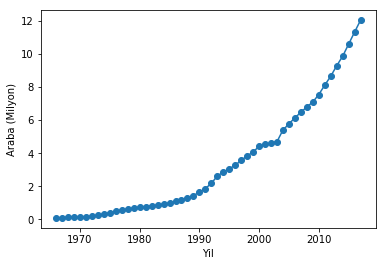

In [ ]:
BaseYear = 1995
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Yil')
plt.ylabel('Araba (Milyon)')

plt.show()

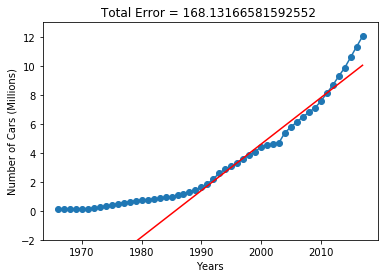

In [ ]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pylab as plt
from IPython.display import clear_output, display, HTML


w_0 = 0.27150786
w_1 = 0.37332256

BaseYear = 1995
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.

fig, ax = plt.subplots()

f = w_1*x + w_0
plt.plot(x+BaseYear, y, 'o-')
ln, = plt.plot(x+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Cars (Millions)')
ax.set_ylim((-2,13))
plt.close(fig)

def set_line(w_1, w_0):

    f = w_1*x + w_0
    e = y - f

    ln.set_ydata(f)
    ax.set_title('Total Error = {} '.format(np.asscalar(e.T*e/2)))
    display(fig)

set_line(0.32,3)

In [ ]:
interact(set_line, w_1=(-2, 2, 0.01), w_0=(-5, 5, 0.01));

interactive(children=(FloatSlider(value=0.0, description='w_1', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.0, description='w_0', max=5.0, min=-5.0, step=0.01), Output()), _dom_classes=('widget-interact',))

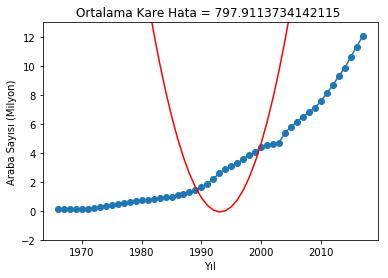

In [ ]:
w_0 = 0.27150786
w_1 = 0.37332256
w_2 = 0.1

BaseYear = 1995
x = np.array(df_arac.Year[0:]).T-BaseYear
y = np.array(df_arac.Car[0:]).T/1000000.

fig, ax = plt.subplots()

f = w_2*x**2 + w_1*x + w_0
plt.plot(x+BaseYear, y, 'o-')
ln, = plt.plot(x+BaseYear, f, 'r')


plt.xlabel('Yıl')
plt.ylabel('Araba Sayısı (Milyon)')
ax.set_ylim((-2,13))
plt.close(fig)

def set_line(w_2, w_1, w_0):
    f = w_2*x**2 + w_1*x + w_0
    e = y - f
    ln.set_ydata(f)
    ax.set_title('Ortalama Kare Hata = {} '.format(np.sum(e*e/len(e))))
    display(fig)

set_line(w_2, w_1, w_0)

In [ ]:
interact(set_line, w_2=(-0.1,0.1,0.001), w_1=(-2, 2, 0.01), w_0=(-5, 5, 0.01))

interactive(children=(FloatSlider(value=0.0, description='w_2', max=0.1, min=-0.1, step=0.001), FloatSlider(value=0.0, description='w_1', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.0, description='w_0', max=5.0, min=-5.0, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.set_line>

## Örnek 1, devam: Modeli Öğrenmek

* Öğrenmek: parametre kestirimi $w = [w_0, w_1]$

* Genelde model veriyi hatasız açıklayamayacağı için her veri noktası için bir hata tanımlıyoruz:

$$e_i = y_i - f(x_i; w)$$

* Toplam kare hata 

$$
E(w) = \frac{1}{2} \sum_i (y_i - f(x_i; w))^2 = \frac{1}{2} \sum_i e_i^2
$$

* Toplam kare hatayı $w_0$ ve $w_1$ parametrelerini değiştirerek azaltmaya çalışabiliriz.

* Hata yüzeyi 

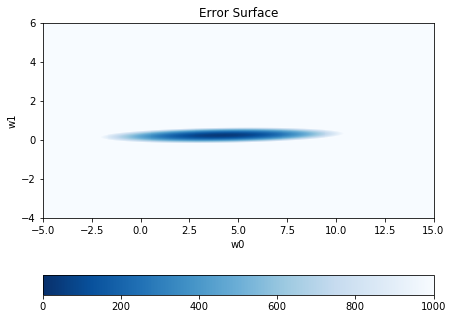

In [ ]:
from itertools import product

BaseYear = 1995
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.

# Setup the vandermonde matrix
N = len(x)
A = np.hstack((np.ones((N,1)), x))

left = -5
right = 15
bottom = -4
top = 6
step = 0.05
W0 = np.arange(left,right, step)
W1 = np.arange(bottom,top, step)

ErrSurf = np.zeros((len(W1),len(W0)))

for i,j in product(range(len(W1)), range(len(W0))):
    e = y - A*np.matrix([W0[j], W1[i]]).T
    ErrSurf[i,j] = e.T*e/2

plt.figure(figsize=(7,7))
plt.imshow(ErrSurf, interpolation='nearest', 
           vmin=0, vmax=1000,origin='lower',
           extent=(left,right,bottom,top),cmap='Blues_r')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Error Surface')
plt.colorbar(orientation='horizontal')
plt.show()

# Modeli Nasıl Kestirebiliriz?

## Fikir: En küçük kare hata 
(Gauss 1795, Legendre 1805)

* Toplam hatanın $w_0$ ve $w_1$'e göre türevini hesapla, sıfıra eşitle ve çıkan denklemleri çöz



\begin{eqnarray}
\left(
\begin{array}{c}
y_0 \\ y_1 \\ \vdots \\ y_{N-1} 
\end{array}
\right)
\approx
\left(
\begin{array}{cc}
1 & x_0 \\ 1 & x_1 \\ \vdots \\ 1 & x_{N-1}  
\end{array}
\right) 
\left(
\begin{array}{c}
 w_0 \\ w_1  
\end{array}
\right)
\end{eqnarray}

\begin{eqnarray}
y \approx A w
\end{eqnarray}

> $A = A(x)$: Model Matrisi

> $w$: Model Parametreleri

> $y$: Gözlemler

* Hata vektörü: $$e = y - Aw$$

\begin{eqnarray}
E(w) & = & \frac{1}{2}e^\top e = \frac{1}{2}(y - Aw)^\top (y - Aw)\\
& = & \frac{1}{2}y^\top y - \frac{1}{2} y^\top Aw - \frac{1}{2} w^\top A^\top y + \frac{1}{2} w^\top A^\top Aw \\
& = & \frac{1}{2} y^\top y - y^\top Aw + \frac{1}{2} w^\top A^\top Aw \\
\end{eqnarray}

### Gradyan
https://tr.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient

\begin{eqnarray}
\frac{d E}{d w } & = & \left(\begin{array}{c}
 \partial E/\partial w_0 \\ \partial E/\partial w_1 \\ \vdots \\  \partial E/\partial w_{K-1}
\end{array}\right)
\end{eqnarray}
  
Toplam hatanın gradyanı
\begin{eqnarray}
\frac{d}{d w }E(w) & = & \frac{d}{d w }(\frac{1}{2} y^\top y) &+ \frac{d}{d w }(- y^\top Aw) &+ \frac{d}{d w }(\frac{1}{2} w^\top A^\top Aw) \\
& = & 0 &- A^\top y &+ A^\top A w \\
& = & - A^\top (y - Aw) \\
& = & - A^\top e \\
& \equiv & \nabla E(w)
\end{eqnarray}

### Yapay zekaya gönül veren herkesin bilmesi gereken eşitlikler
* Vektör iç çarpımının gradyeni
\begin{eqnarray}
\frac{d}{d w }(h^\top w) & = & h
\end{eqnarray}

* Karesel bir ifadenin gradyeni
\begin{eqnarray}
\frac{d}{d w }(w^\top K w) & = & (K+K^\top) w
\end{eqnarray}


### En küçük kare hata çözümü doğrusal modellerde doğrusal denklemlerin çözümü ile bulunabiliyor


\begin{eqnarray}
w^* & = & \arg\min_{w} E(w)
\end{eqnarray}

* Eniyileme Şartı (gradyan sıfır olmalı )

\begin{eqnarray}
\nabla E(w^*) & = & 0
\end{eqnarray}

\begin{eqnarray}
0 & = & - A^\top y + A^\top A w^*  \\
A^\top y & = &  A^\top A w^* \\
w^* & = & (A^\top A)^{-1} A^\top y 
\end{eqnarray}

* Geometrik (Projeksyon) yorumu:

\begin{eqnarray}
f & = A w^*  = A (A^\top A)^{-1} A^\top y 
\end{eqnarray}



Parametreler: 
w0 =  [[ 4.13258253]] 
w1 =  [[ 0.20987778]]
Toplam Kare Hata: [[ 37.19722385]]


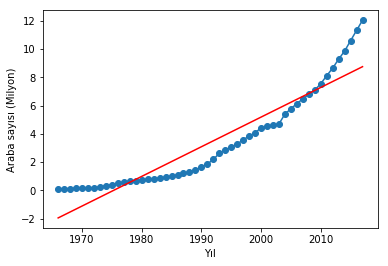

In [ ]:
# Solving the Normal Equations

# Setup the Design matrix
N = len(x)
A = np.hstack((np.ones((N,1)), x))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

print('Parametreler: \nw0 = ', w_ls[0],'\nw1 = ', w_ls[1] )
print('Toplam Kare Hata:', E/2)

f = np.asscalar(w_ls[1])*x + np.asscalar(w_ls[0])
plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')


plt.xlabel('Yıl')
plt.ylabel('Araba sayısı (Milyon)')
plt.show()

## Polinomlar 


### Parabol
\begin{eqnarray}
\left(
\begin{array}{c}
y_0 \\ y_1 \\ \vdots \\ y_{N-1} 
\end{array}
\right)
\approx
\left(
\begin{array}{ccc}
1 & x_0 & x_0^2 \\ 1 & x_1 & x_1^2 \\ \vdots \\ 1 & x_{N-1} & x_{N-1}^2   
\end{array}
\right) 
\left(
\begin{array}{c}
 w_0 \\ w_1  \\ w_2
\end{array}
\right)
\end{eqnarray}

### $K$ derecesinde polinom
\begin{eqnarray}
\left(
\begin{array}{c}
y_0 \\ y_1 \\ \vdots \\ y_{N-1} 
\end{array}
\right)
\approx
\left(
\begin{array}{ccccc}
1 & x_0 & x_0^2 & \dots & x_0^K \\ 1 & x_1 & x_1^2 & \dots & x_1^K\\ \vdots \\ 1 & x_{N-1} & x_{N-1}^2 & \dots & x_{N-1}^K  
\end{array}
\right) 
\left(
\begin{array}{c}
 w_0 \\ w_1  \\ w_2 \\ \vdots \\ w_K
\end{array}
\right)
\end{eqnarray}


\begin{eqnarray}
y \approx A w
\end{eqnarray}

> $A = A(x)$: Model matrisi 

> $w$: Model Parametreleri

> $y$: Gözlemler

Polinom oturtmada ortaya çıkan özel yapılı matrislere  __Vandermonde__ matrisleri de denmektedir.

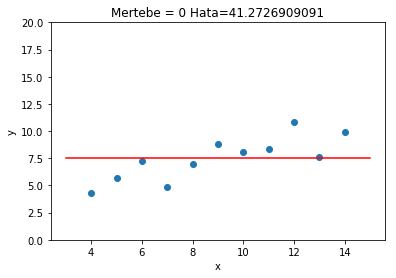

In [ ]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
N = len(x)
x = x.reshape((N,1))
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]).reshape((N,1))
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]).reshape((N,1))
#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]).reshape((N,1))

def fit_and_plot_poly(degree):

    #A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
    A = np.hstack((np.power(x,i) for i in range(degree+1)))
    # Setup the vandermonde matrix
    xx = np.matrix(np.linspace(np.asscalar(min(x))-1,np.asscalar(max(x))+1,300)).T
    A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

    #plt.imshow(A, interpolation='nearest')
    # Solve the least squares problem
    w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
    f = A2*w_ls
    plt.plot(x, y, 'o')
    plt.plot(xx, f, 'r')

    plt.xlabel('x')
    plt.ylabel('y')

    plt.gca().set_ylim((0,20))
    #plt.gca().set_xlim((1950,2025))
    
    if E:
        plt.title('Mertebe = '+str(degree)+' Hata='+str(E[0]))
    else:
        plt.title('Mertebe = '+str(degree)+' Hata= 0')
        
    plt.show()

fit_and_plot_poly(0)

In [ ]:
interact(fit_and_plot_poly, degree=(0,10))

interactive(children=(IntSlider(value=5, description='degree', max=10), Output()), _dom_classes=('widget-interact',))

<function __main__.fit_and_plot_poly>

Overfit: Aşırı uyum